In [3]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    name:str
    game:Literal["Cricket","Football"]
    

The TypedDict class allows to specify keys and their corresponding value types. And as these are type hints they can be used by static type checkers or IDEs to catch otential type-related errors before the code is run but they are not enforced at runtime


In [18]:
def play_game(state:TypedDictState):
    print("--Play Game node has been called--")
    return {"name":state["name"] + " wants to play "}

def play_cricket(state:TypedDictState):
    print("--Cricket node has been called--")
    return {"name":state["name"]+ "cricket" ,"game":"cricket" }

def play_football(state:TypedDictState):
    print("--Football node has been called--")
    return {"name":state["name"]+ "football","game":"football"}


In [20]:
import random
def decide_play(state:TypedDictState)->Literal["cricket","football"]:
    if random.random()<0.5:
        return "cricket"
    else:
        return "football"



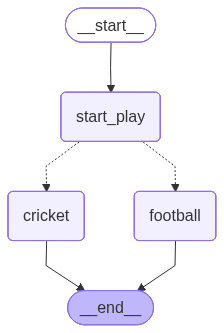

In [21]:

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypedDictState)
builder.add_node("start_play",play_game)
builder.add_node("cricket",play_cricket)
builder.add_node("football",play_football)

##Flow of the graph
builder.add_edge(START,"start_play")
builder.add_conditional_edges("start_play",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("football",END)


graph_builder=builder.compile()

##view the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [22]:
graph_builder.invoke({"name":"Ayush"})

--Play Game node has been called--
--Football node has been called--


{'name': 'Ayush wants to play football', 'game': 'football'}

Dataclasses

In [24]:
##Dataclasses

from dataclasses import dataclass

@dataclass
class DataClassState:
    name:str
    game:Literal["Cricket","Football"]
    

In [26]:
def play_game(state:DataClassState):
    print("--Play Game node has been called--")
    return {"name":state.name + " wants to play "}

def play_cricket(state:DataClassState):
    print("--Cricket node has been called--")
    return {"name":state.name+ "cricket" ,"game":"cricket" }

def play_football(state:DataClassState):
    print("--Football node has been called--")
    return {"name":state.name+ "football","game":"football"}


In [27]:
import random
def decide_play(state:DataClassState)->Literal["cricket","football"]:
    if random.random()<0.5:
        return "cricket"
    else:
        return "football"

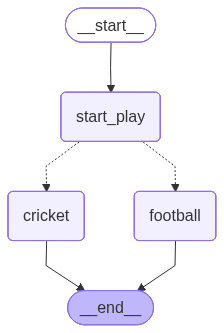

In [28]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(DataClassState)
builder.add_node("start_play",play_game)
builder.add_node("cricket",play_cricket)
builder.add_node("football",play_football)

##Flow of the graph
builder.add_edge(START,"start_play")
builder.add_conditional_edges("start_play",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("football",END)


graph_builder=builder.compile()

##view the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [29]:
graph_builder.invoke(DataClassState(name="Ayush",game="Badminton"))

--Play Game node has been called--
--Cricket node has been called--


{'name': 'Ayush wants to play cricket', 'game': 'cricket'}